In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
# Graphing parameters
#sns.set(style="white")
rc = {'figure.figsize':(5,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Arial',
      'font.size' : 15,
      'figure.dpi':300}

plt.rcParams.update(rc)

In [3]:
# Helper Functions

#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

def annotate(data, **kws):
    n = polyfit(x1, y1, 1).get('r_squared')
    ax = plt.gca()
    g.axes[0,0].text(.70, .25, "r2={:.2f}".format(n), transform=ax.transAxes)


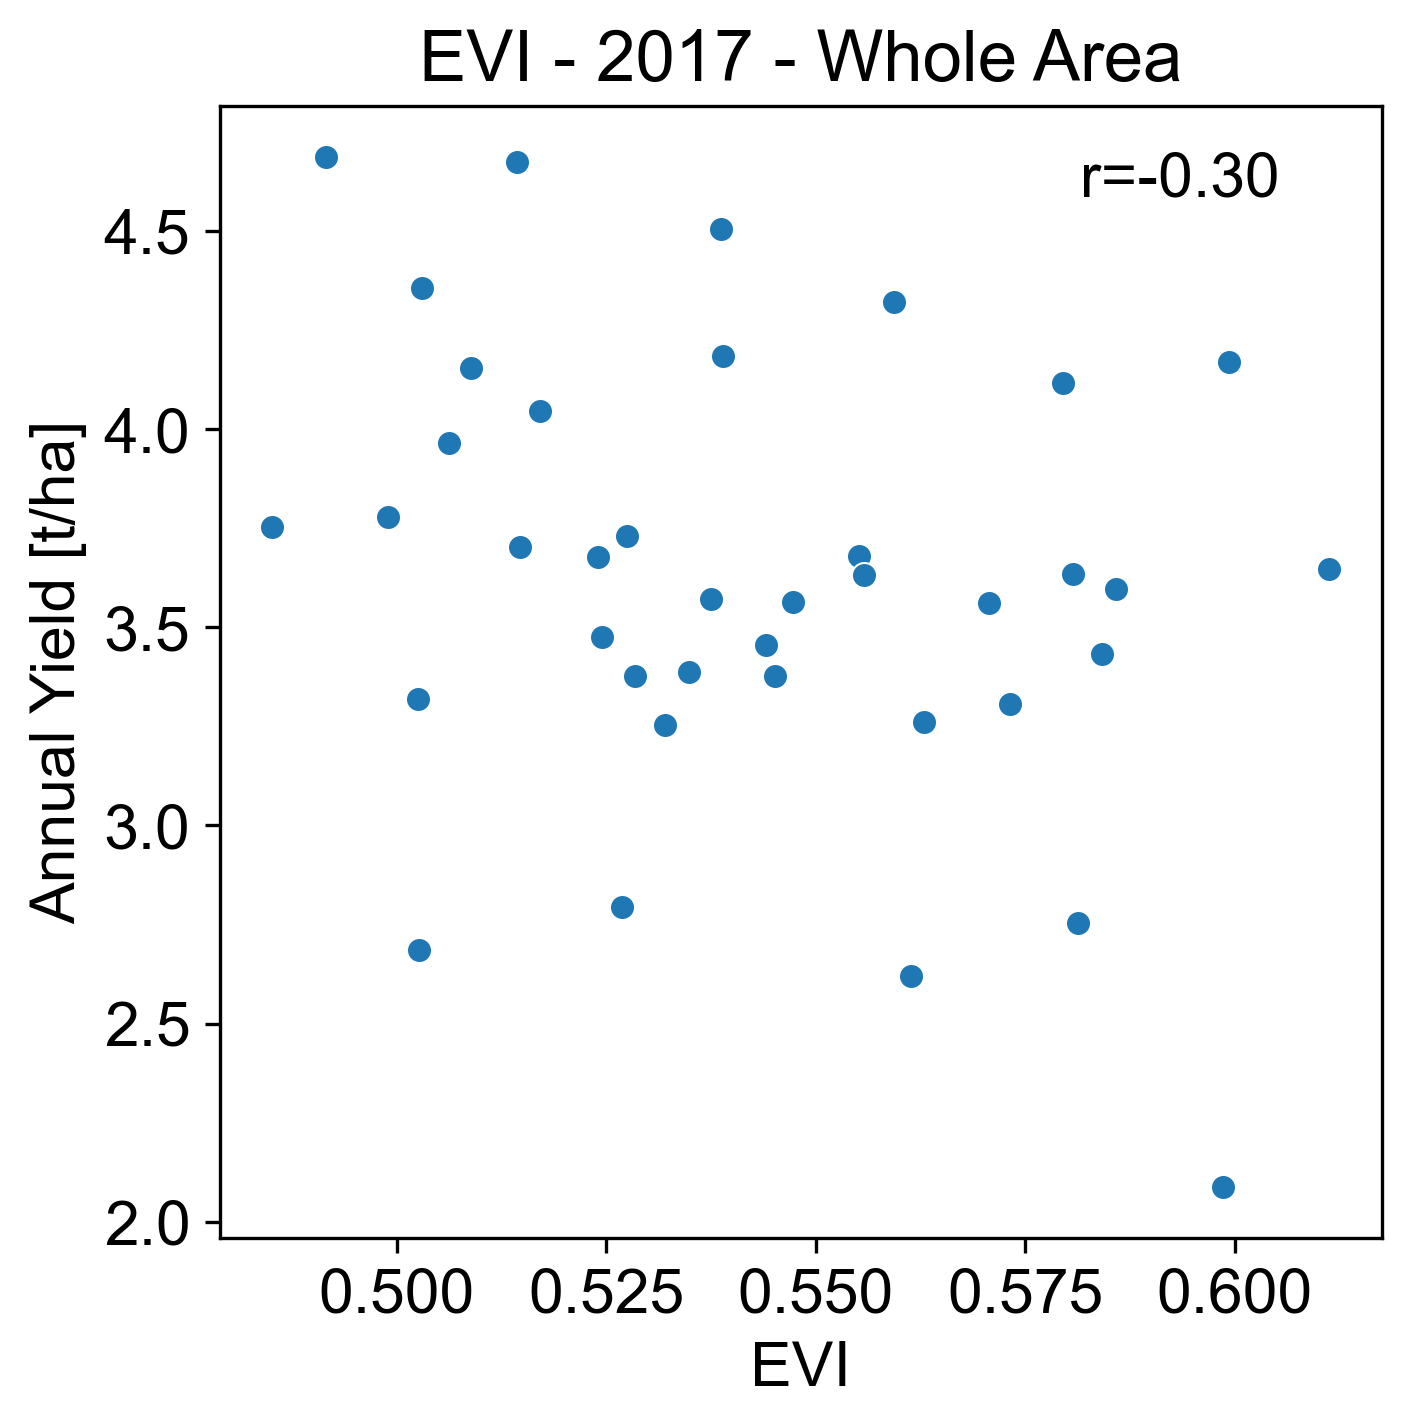

In [4]:
# FINAL ONE!!!!!! EVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
harvest = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
production = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
production = production[(production.param=='production')].reset_index(drop=True)
data = production.copy()
data.value = production.value/harvest.value
# Select by criteria
data = data[(data.year <= 2017) & (data.year >=2017)].groupby('muni').mean().reset_index()

zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1aa/TableToTable_ZonalStatisticsAsTable_OutTable_eviTS_2017.csv')

merged = pd.merge(data, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
#merged = merged.drop(12)
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 2017 - Whole Area', fontsize=17)
g.set_xlabel('EVI')
g.set_ylabel('Annual Yield [t/ha]')
g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

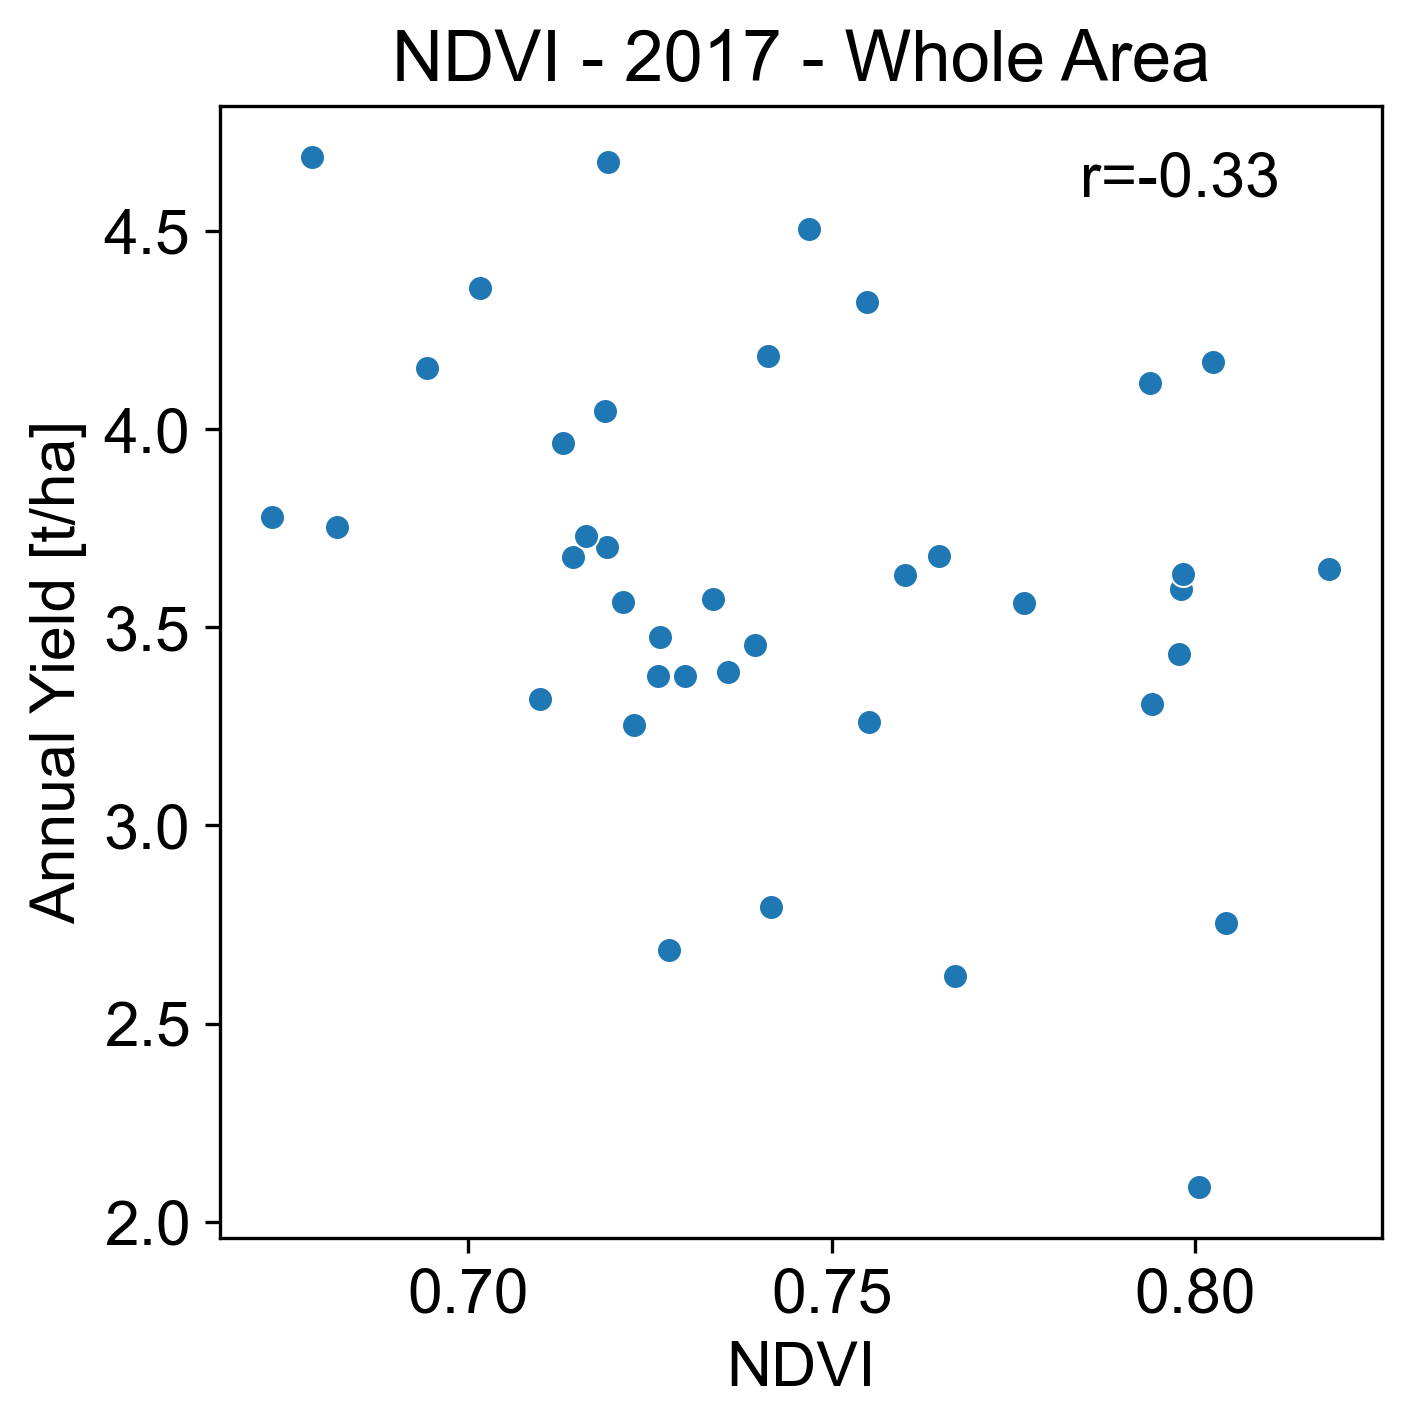

In [5]:
# FINAL ONE!!!!!! NDVI
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
harvest = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
production = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
production = production[(production.param=='production')].reset_index(drop=True)
data = production.copy()
data.value = production.value/harvest.value
# Select by criteria
data = data[(data.year <= 2017) & (data.year >=2017)].groupby('muni').mean().reset_index()

zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1aa/TableToTable_ZonalStatisticsAsTable_OutTable_ndviTS_2017.csv')

merged = pd.merge(data, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
#merged = merged.drop(12)
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 2017 - Whole Area', fontsize=17)
g.set_xlabel('NDVI')
g.set_ylabel('Annual Yield [t/ha]')
g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

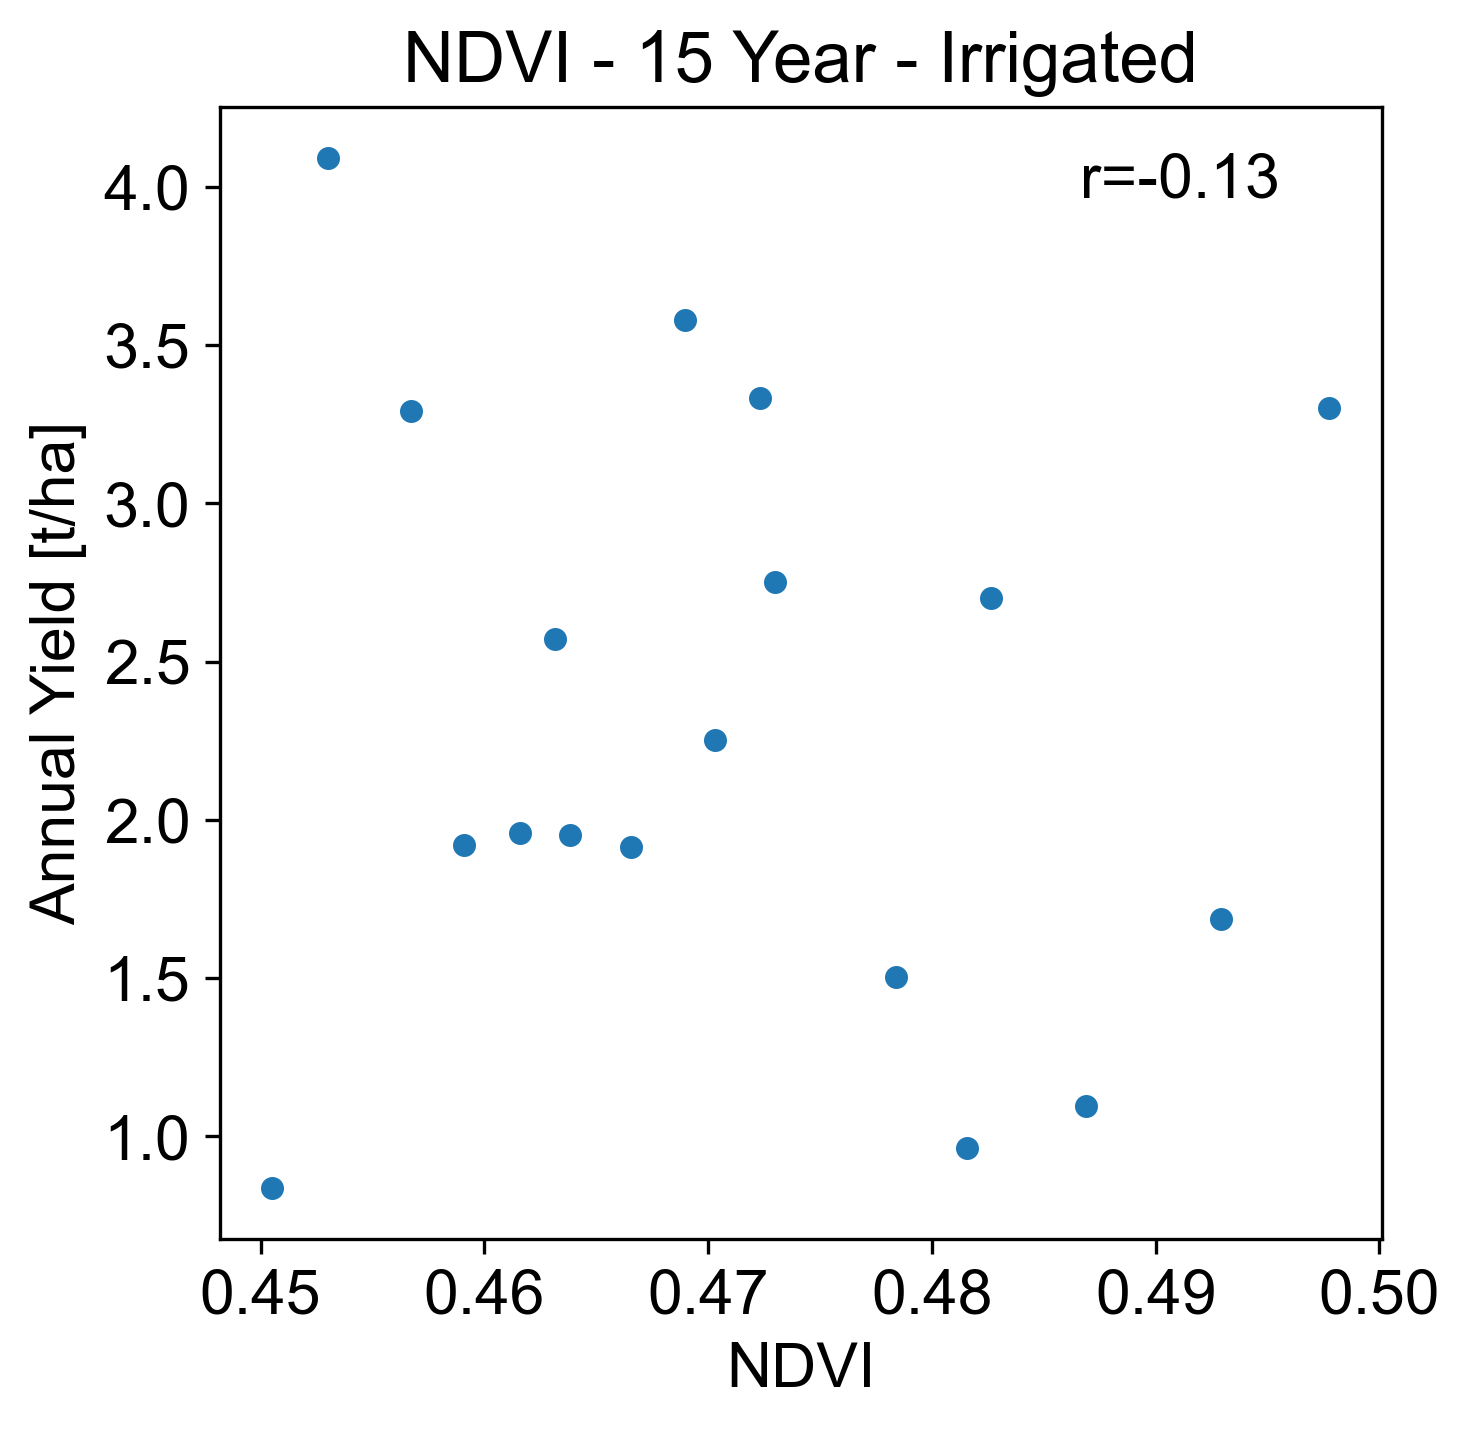

In [196]:
# BY ECOSYSTEM
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
harvest = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
production = dataOfficial.groupby(['year','param','muni','ecosystem']).sum().reset_index()
production = production[(production.param=='production') & (production.ecosystem=='irri') ].reset_index(drop=True)
data = production.copy()
data.value = production.value/harvest.value
# Select by criteria
data = data[(data.year <= 2017) & (data.year >=2003)].groupby('muni').mean().reset_index()

zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_eviTS_15year.csv')

merged = pd.merge(data, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
#merged = merged.drop(12)
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 15 Year - Irrigated', fontsize=17)
g.set_xlabel('NDVI')
g.set_ylabel('Annual Yield [t/ha]')
g.text(.74,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

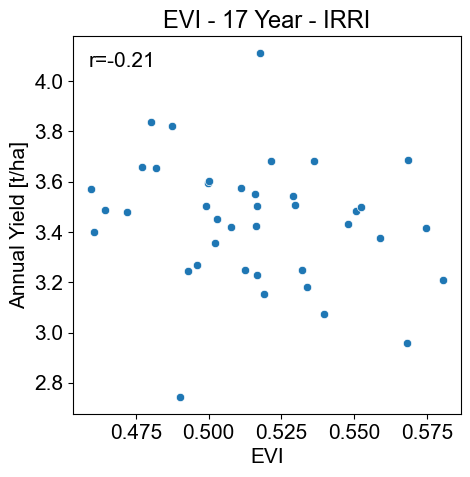

In [130]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1aa/TableToTable_ZonalStatisticsAsTable_OutTable_eviTS_15year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'rf')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2003)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 17 Year - IRRI', fontsize=17)
g.set_xlabel('EVI')
g.set_ylabel('Annual Yield [t/ha]')
g.text(.04,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
#sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

In [103]:
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 17 Year - IRRI', fontsize=17)
g.set_xlabel('EVI')
g.set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
#g.text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

TypeError: '(slice(None, None, None), ['value', 'MEAN'])' is an invalid key

In [110]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/2017_muniYields.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_zonalstats_rf_evi2017.csv')
merged = pd.merge(dataOfficial, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
merged

,muni,yield,OID_,ADM3_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,Ajuy,3.377339,11,Ajuy,11,442.0,0.002229,0.047533,0.722908,0.675375,0.521399,0.081657,230.458297
1,Alimodian,3.596583,28,Alimodian,28,172.0,0.000867,0.420358,0.713800,0.293442,0.537591,0.059784,92.465625
2,Anilao,3.455836,19,Anilao,19,530.0,0.002673,0.144856,0.721408,0.576553,0.543721,0.066294,288.172221
3,Balasan,3.319242,2,Balasan,2,373.0,0.001881,0.129400,0.660792,0.531392,0.488856,0.048442,182.343333
4,Barotac Viejo,3.678698,15,Barotac Viejo,15,422.0,0.002128,0.232517,0.731792,0.499275,0.547703,0.063161,231.130463
5,Cabatuan,3.260271,27,Cabatuan,27,557.0,0.002809,0.382400,0.706450,0.324050,0.550062,0.054288,306.384650
6,Calinog,3.562004,13,Calinog,13,282.0,0.001422,0.410692,0.699567,0.288875,0.553290,0.048844,156.027875
7,Carles,2.686869,1,Carles,1,172.0,0.000867,0.048650,0.627017,0.578367,0.479140,0.089777,82.412158
8,City of Passi,3.536332,10,City of Passi,10,700.0,0.003530,0.430708,0.716492,0.285783,0.552723,0.043264,386.906167
9,Concepcion,3.679632,7,Concepcion,7,148.0,0.000746,0.236640,0.704292,0.467652,0.527589,0.073806,78.083131


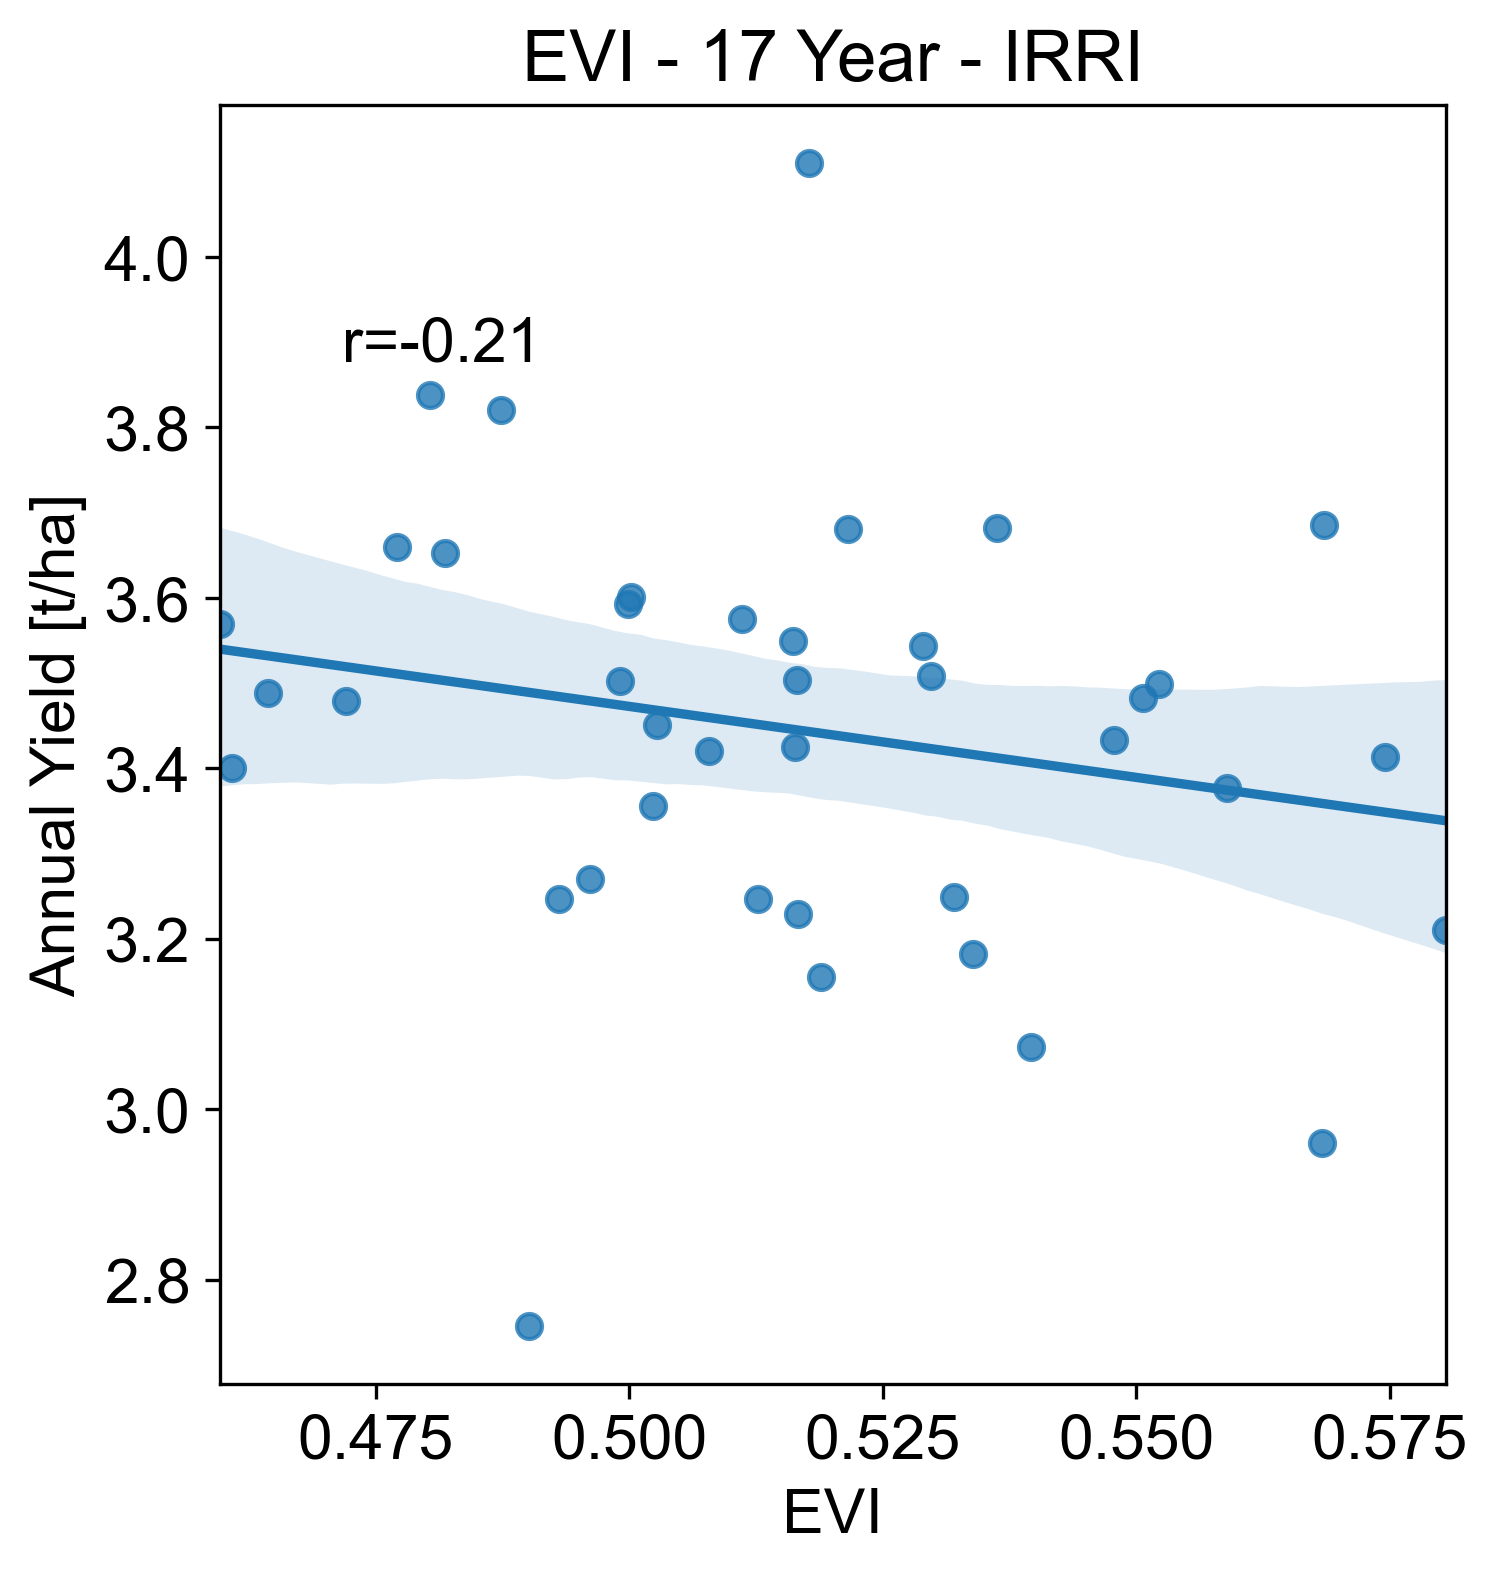

In [97]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1aa/TableToTable_ZonalStatisticsAsTable_OutTable_eviTS_15year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'rf')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2003)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
#corr.info()
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 17 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('EVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
g.axes[0,0].text(.1,.8, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

In [21]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
harvest = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
production = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
production = production[(production.param=='production')].reset_index(drop=True)
data = production.copy()
data.value = production.value/harvest.value
# Select by criteria
data = data[(data.year <= 2017) & (data.year >=2012)].groupby('muni').mean().reset_index()
data

,muni,year,value
0,Ajuy,2014.5,3.729346
1,Alimodian,2014.5,3.527309
2,Anilao,2014.5,3.719945
3,Badiangan,2014.5,3.880008
4,Balasan,2014.5,3.141288
5,Banate,2014.5,3.948691
6,Barotac Nuevo,2014.5,3.976579
7,Barotac Viejo,2014.5,3.636074
8,Batad,2014.5,3.628047
9,Bingawan,2014.5,3.215098


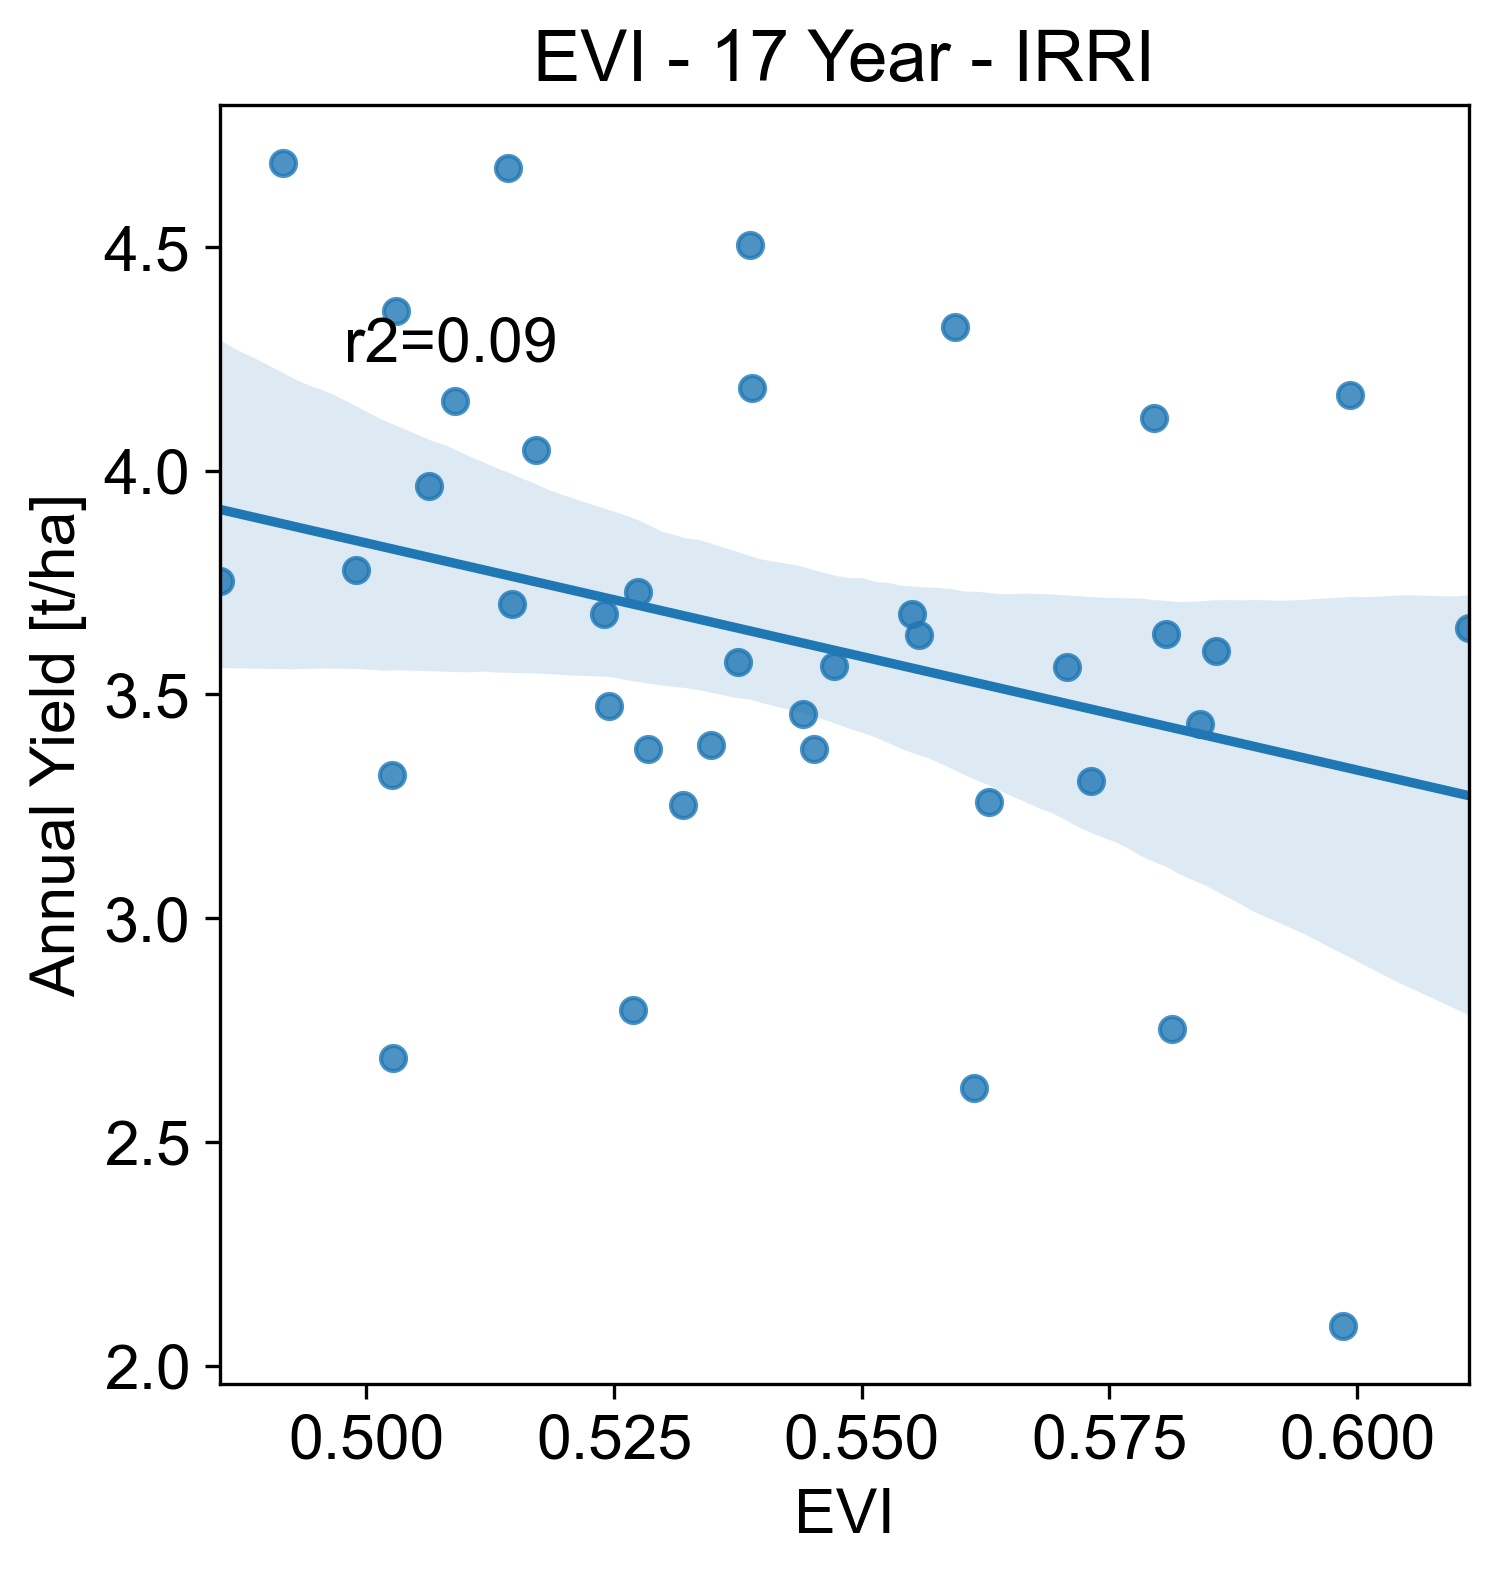

In [27]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
harvest = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
harvest = harvest[(harvest.param=='harvest')].reset_index(drop=True)
production = dataOfficial.groupby(['year','param','muni']).sum().reset_index()
production = production[(production.param=='production')].reset_index(drop=True)
data = production.copy()
data.value = production.value/harvest.value
# Select by criteria
data = data[(data.year <= 2017) & (data.year >=2017)].groupby('muni').mean().reset_index()

zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1aa/TableToTable_ZonalStatisticsAsTable_OutTable_eviTS_2017.csv')

merged = pd.merge(data, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
#merged = merged.drop(12)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 17 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('EVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.show()

In [29]:
merged

,muni,year,value,OID_,ADM3_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,Ajuy,2017,3.377339,1,Ajuy,1,656.0,0.003309,0.190400,0.779192,0.588792,0.545188,0.080076,357.643486
1,Alimodian,2017,3.596583,20,Alimodian,20,999.0,0.005039,0.418708,0.725267,0.306558,0.585807,0.055994,585.221460
2,Anilao,2017,3.455836,40,Anilao,40,695.0,0.003505,0.350242,0.690333,0.340092,0.544023,0.048089,378.095713
3,Badiangan,2017,4.169582,30,Badiangan,30,383.0,0.001932,0.444342,0.679258,0.234917,0.599297,0.040682,229.530784
4,Balasan,2017,3.319242,6,Balasan,6,562.0,0.002834,0.098311,0.736375,0.638064,0.502603,0.058880,282.462704
5,Banate,2017,4.047271,7,Banate,7,617.0,0.003112,0.223492,0.745825,0.522333,0.517116,0.059978,319.060496
6,Barotac Nuevo,2017,3.966211,31,Barotac Nuevo,31,1010.0,0.005094,0.195783,0.714475,0.518692,0.506275,0.051200,511.337937
7,Barotac Viejo,2017,3.678698,2,Barotac Viejo,2,726.0,0.003662,0.323167,0.718767,0.395600,0.523982,0.059150,380.411213
8,Batad,2017,3.386649,8,Batad,8,540.0,0.002724,0.206025,0.727483,0.521458,0.534824,0.060343,288.805041
9,Bingawan,2017,2.088329,42,Bingawan,42,452.0,0.002280,0.496183,0.723117,0.226933,0.598589,0.038540,270.562442


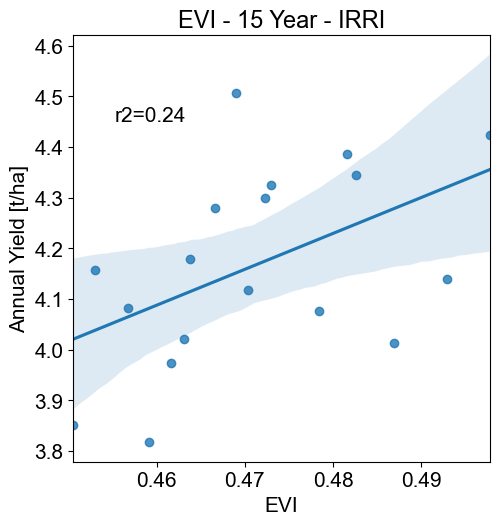

In [57]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_eviTS_15year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2003)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 15 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('EVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

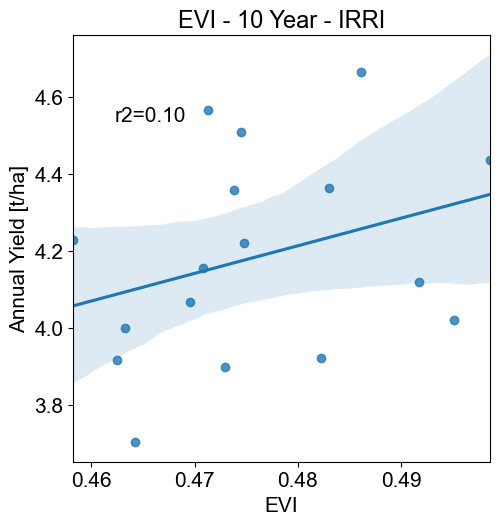

In [58]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_eviTS_10year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2008)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 10 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('EVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

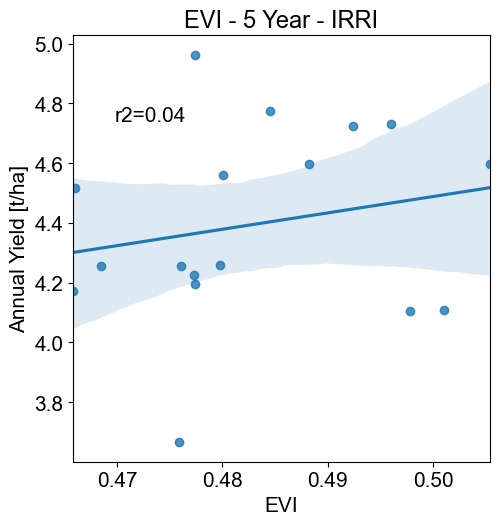

In [59]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_eviTS_5year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2013)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('EVI - 5 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('EVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

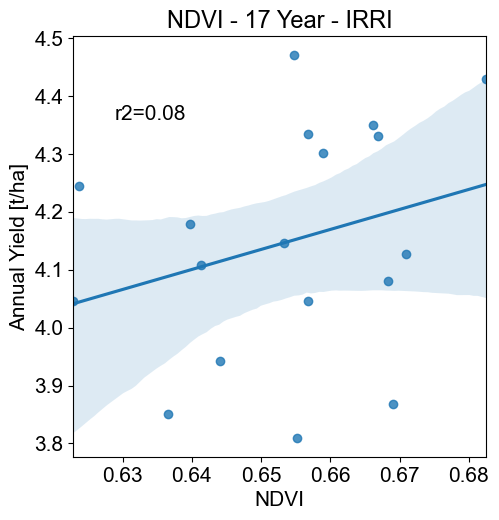

In [63]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_ndviTS_17year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2001)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 17 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('NDVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

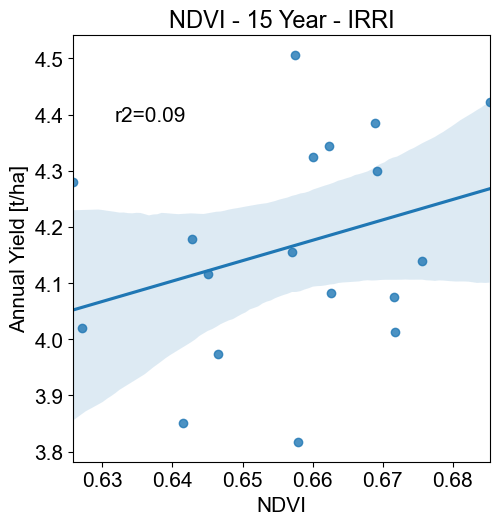

In [62]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_ndviTS_15year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2003)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 15 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('NDVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

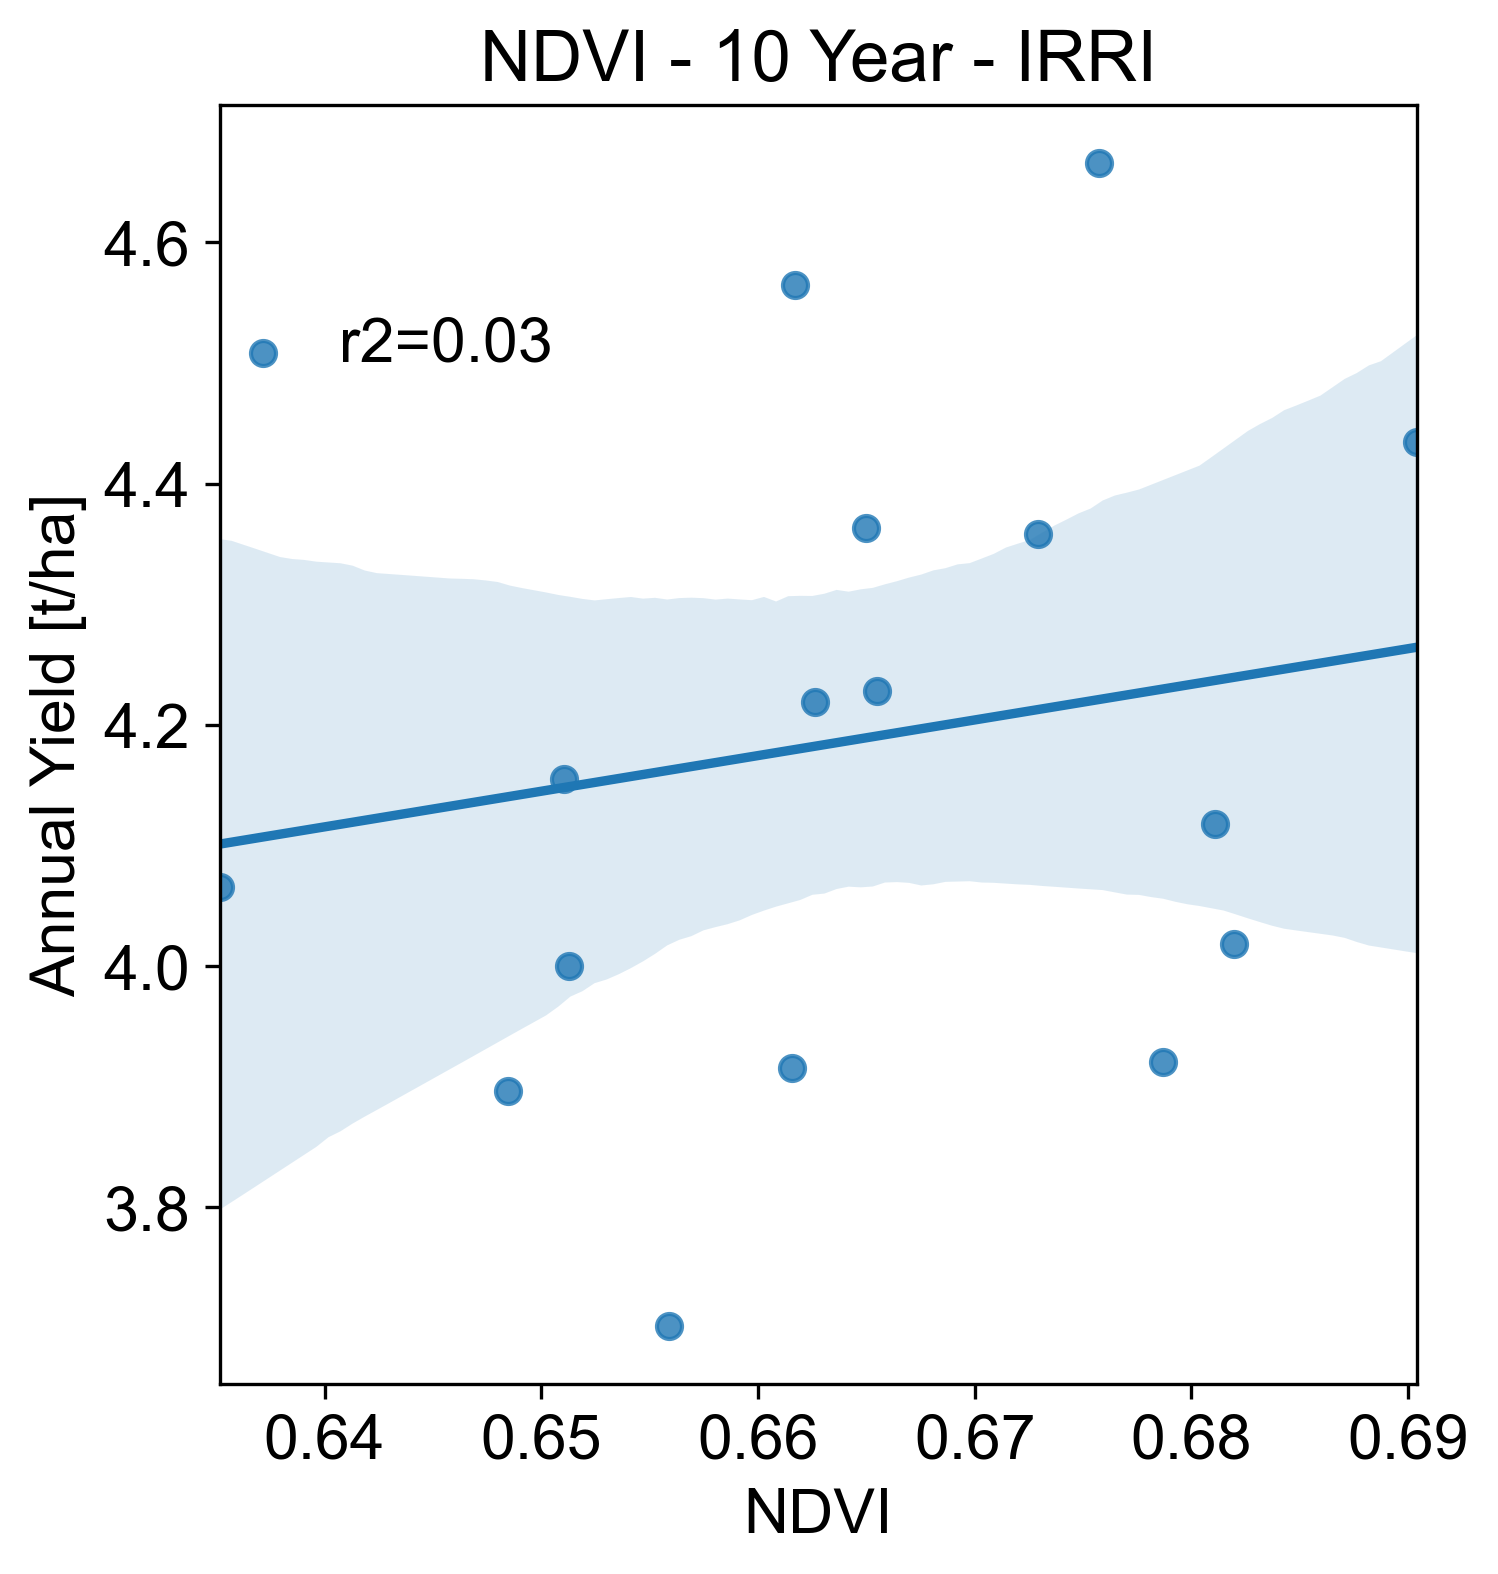

In [46]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_ndviTS_10year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2008)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 10 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('NDVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()

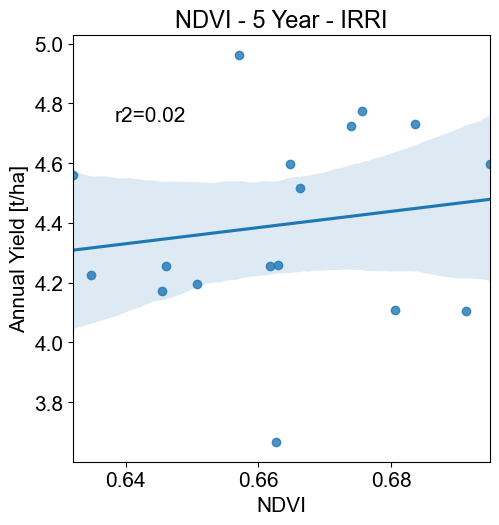

In [66]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/fig1a/TableToTable_ZonalSt_irr_ndviTS_5year.csv')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'irri')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2013)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)
g = sns.lmplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('NDVI - 5 Year - IRRI', fontsize=17)
g.axes[0,0].set_xlabel('NDVI')
g.axes[0,0].set_ylabel('Annual Yield [t/ha]')

# defining the variables 
x1 = merged['MEAN'].tolist() 
y1 = merged['value'].tolist() 

#polynomial fit with degree = 2
#model = np.poly1d(np.polyfit(x1, y1, 2))
#plt.annotate(.70, .25, "r2={:.2f}".format(4))
#g.map_dataframe(annotate)
n = polyfit(x1, y1, 1).get('r_squared')
g.axes[0,0].text(.1,.8, "r2={:.2f}".format(n), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()